## Analysis of 2007 CFS Data

The commodity flow survey(CFS) dataset includes yearly information of freight shipments in the US for different industries. For the purpose of this project the data is used to determine the local demand and production capacities in the US for food products.

Data Source: US Census Bureau

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from statistics import stdev 
import pandas as pd
import math

In [6]:
xls = pd.ExcelFile('Origin_by_Destination_by_Commodity-2.xlsx')
df = pd.read_excel(xls, 'Data')

## Shipments from the Origin For the Analysis of Facility Capacities

In [7]:
df.head(5)

,"Table 1: Shipment Characteristics by Two-Digit SCTG Commodity for Geographic Area of Origin by Destination: 2007\n Estimates are based on data from the 2007 Commodity Flow Survey. Because of rounding, estimates may not be additive.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Origin Geography,NaN,Destination Geography,NaN,SCTG Code (1),Commodity Description,2007,NaN,NaN,NaN,NaN,NaN
1,State,State/CFS Area,State,All U.S. Destinations/State/CFS Area,NaN,NaN,Value \n(million $),Tons (thousands),Ton-miles (millions) (2),Value CV (3),Tons CV,Ton-miles CV
2,AL,Alabama,-,All U.S. Destinations,00,All Commodities,182785,268926,58222,9.1,9.8,11.2
3,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
4,AL,Alabama,-,All U.S. Destinations,03,Other agricultural products,1392,3652,629,20.9,23.5,33.3


In [8]:
df.columns = ["Origin State", "Origin State/CFS Area", "Destination State", "Destination", "SCTG", "Commodity", "Value", "Tons(thousands)", "Ton-miles(millions)", "Value CV", "Tons CV", "Ton-miles CV"]

In [9]:
df.head(5)

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
0,Origin Geography,NaN,Destination Geography,NaN,SCTG Code (1),Commodity Description,2007,NaN,NaN,NaN,NaN,NaN
1,State,State/CFS Area,State,All U.S. Destinations/State/CFS Area,NaN,NaN,Value \n(million $),Tons (thousands),Ton-miles (millions) (2),Value CV (3),Tons CV,Ton-miles CV
2,AL,Alabama,-,All U.S. Destinations,00,All Commodities,182785,268926,58222,9.1,9.8,11.2
3,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
4,AL,Alabama,-,All U.S. Destinations,03,Other agricultural products,1392,3652,629,20.9,23.5,33.3


In [10]:
df=df.drop(df.index[0])

In [11]:
df=df.drop(df.index[0])

In [12]:
df = df.reset_index(drop=True)

In [13]:
df 

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
0,AL,Alabama,-,All U.S. Destinations,00,All Commodities,182785,268926,58222,9.1,9.8,11.2
1,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
2,AL,Alabama,-,All U.S. Destinations,03,Other agricultural products,1392,3652,629,20.9,23.5,33.3
3,AL,Alabama,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",1349,4151,419,30.3,33,29.8
4,AL,Alabama,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",4517,2093,877,22.6,21,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...
503490,WY,Wyoming,WY,Wyoming,39,"Furniture, mattresses and mattress supports, l...",12,1,Z,45.4,43.9,39.5
503491,WY,Wyoming,WY,Wyoming,40,Miscellaneous manufactured products,200,S,S,33.9,S,S
503492,WY,Wyoming,WY,Wyoming,41,Waste and scrap,S,S,S,S,S,S
503493,WY,Wyoming,WY,Wyoming,43,Mixed freight,121,14,1,31.7,29.4,26.7


All Commodities in a certain state is available in the table. Be careful about "Commodity Unknown".

In [102]:
df1=df[df['Commodity']=="All Commodities"]

In [103]:
df2=df1[df1['Destination']=="All U.S. Destinations"]

In [104]:
df2

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
0,AL,Alabama,-,All U.S. Destinations,00,All Commodities,182785,268926,58222,9.1,9.8,11.2
4129,AL,"Birmingham-Hoover-Cullman, CFS Area",-,All U.S. Destinations,00,All Commodities,48966,70117,12563,12.5,6.1,9.8
6986,AL,"Mobile-Daphne-Fairhope, CFS Area",-,All U.S. Destinations,00,All Commodities,15246,17297,6681,13.4,11.8,31.4
9221,AL,Remainder of Alabama,-,All U.S. Destinations,00,All Commodities,118573,181511,38978,11.6,13.1,12.4
12753,AK,Alaska,-,All U.S. Destinations,00,All Commodities,18184,28743,12633,15.9,16.4,15.9
...,...,...,...,...,...,...,...,...,...,...,...,...
486404,WV,West Virginia,-,All U.S. Destinations,00,All Commodities,49842,222895,85627,3.9,17.6,20
489505,WI,Wisconsin,-,All U.S. Destinations,00,All Commodities,263658,203766,64301,2.2,10.5,14
493972,WI,"Milwaukee-Racine-Waukesha, CFS Area",-,All U.S. Destinations,00,All Commodities,85504,60263,12149,5.6,14.6,19.6
497454,WI,Remainder of Wisconsin,-,All U.S. Destinations,00,All Commodities,178154,143502,52152,1.9,11.6,15.9


In [105]:
df3=df2.sort_values('Value', ascending=False).drop_duplicates(['Origin State'])
df3

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
27720,CA,California,-,All U.S. Destinations,00,All Commodities,1341220,900817,180976,1.3,6.8,3.6
422099,TX,Texas,-,All U.S. Destinations,00,All Commodities,1166608,1338753,252819,5.3,4.7,5.1
112668,IL,Illinois,-,All U.S. Destinations,00,All Commodities,639177,626898,180924,3.9,3.6,8.8
324699,OH,Ohio,-,All U.S. Destinations,00,All Commodities,563187,475857,96370,4.7,3.7,7.1
283794,NY,New York,-,All U.S. Destinations,00,All Commodities,549674,335782,73793,2.5,5.3,17
369364,PA,Pennsylvania,-,All U.S. Destinations,00,All Commodities,489415,500393,88690,6.5,9.4,6
406732,TN,Tennessee,-,All U.S. Destinations,00,All Commodities,433270,328935,67397,11.4,14,20.3
267996,NJ,New Jersey,-,All U.S. Destinations,00,All Commodities,422581,230155,37087,5.9,5.8,9.4
207066,MI,Michigan,-,All U.S. Destinations,00,All Commodities,409172,282752,66965,5.5,6,7.2
73577,FL,Florida,-,All U.S. Destinations,00,All Commodities,399941,540450,73811,3.7,7.9,5.7


To see which state ships "All Commodities" that values the most in dollars.

In [106]:
frame = pd.DataFrame({'Origin State': df3['Origin State'],'Value in million $': df3['Value']})
frame


,Origin State,Value in million $
27720,CA,1341220
422099,TX,1166608
112668,IL,639177
324699,OH,563187
283794,NY,549674
369364,PA,489415
406732,TN,433270
267996,NJ,422581
207066,MI,409172
73577,FL,399941


### Total Shipment Values in Dollars for each state in 2007

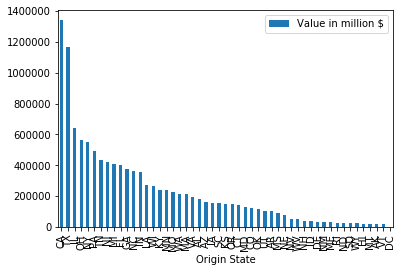

In [107]:
frame.plot(x='Origin State', y='Value in million $', kind='bar')

Shipments based from CA has the highest value in Dollars. Let's explore what kind of products are shipped and which products adds value the most.

In [124]:
df8= df[df["Origin State"]=='CA']

In [126]:
df8 = df8[df8["Destination"]=='All U.S. Destinations']
df8

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
27720,CA,California,-,All U.S. Destinations,00,All Commodities,1341220,900817,180976,1.3,6.8,3.6
27721,CA,California,-,All U.S. Destinations,01,Live animals and live fish,332,23,S,37.6,45.3,S
27722,CA,California,-,All U.S. Destinations,02,Cereal grains,646,1935,S,31.5,48.3,S
27723,CA,California,-,All U.S. Destinations,03,Other agricultural products,26160,17904,10650,12.5,18.1,19
27724,CA,California,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",6249,16051,3083,16.4,28.9,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...
45499,CA,Remainder of California,-,All U.S. Destinations,39,"Furniture, mattresses and mattress supports, l...",506,378,61,29.8,44.4,41.4
45500,CA,Remainder of California,-,All U.S. Destinations,40,Miscellaneous manufactured products,4533,1630,418,18.4,31.4,20.5
45501,CA,Remainder of California,-,All U.S. Destinations,41,Waste and scrap,1299,3010,436,40.1,26.4,33.4
45502,CA,Remainder of California,-,All U.S. Destinations,43,Mixed freight,35274,11884,1858,29,34.4,25.9


In [127]:
df8=df8[pd.to_numeric(df8['Value'], errors='coerce').notnull()]
df8

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
27720,CA,California,-,All U.S. Destinations,00,All Commodities,1341220,900817,180976,1.3,6.8,3.6
27721,CA,California,-,All U.S. Destinations,01,Live animals and live fish,332,23,S,37.6,45.3,S
27722,CA,California,-,All U.S. Destinations,02,Cereal grains,646,1935,S,31.5,48.3,S
27723,CA,California,-,All U.S. Destinations,03,Other agricultural products,26160,17904,10650,12.5,18.1,19
27724,CA,California,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",6249,16051,3083,16.4,28.9,26.3
...,...,...,...,...,...,...,...,...,...,...,...,...
45499,CA,Remainder of California,-,All U.S. Destinations,39,"Furniture, mattresses and mattress supports, l...",506,378,61,29.8,44.4,41.4
45500,CA,Remainder of California,-,All U.S. Destinations,40,Miscellaneous manufactured products,4533,1630,418,18.4,31.4,20.5
45501,CA,Remainder of California,-,All U.S. Destinations,41,Waste and scrap,1299,3010,436,40.1,26.4,33.4
45502,CA,Remainder of California,-,All U.S. Destinations,43,Mixed freight,35274,11884,1858,29,34.4,25.9


In [130]:
df9=df8[df8['Commodity']!= "All Commodities"]
df9

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
27721,CA,California,-,All U.S. Destinations,01,Live animals and live fish,332,23,S,37.6,45.3,S
27722,CA,California,-,All U.S. Destinations,02,Cereal grains,646,1935,S,31.5,48.3,S
27723,CA,California,-,All U.S. Destinations,03,Other agricultural products,26160,17904,10650,12.5,18.1,19
27724,CA,California,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",6249,16051,3083,16.4,28.9,26.3
27725,CA,California,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",26859,8042,2443,9.7,10.2,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...
45499,CA,Remainder of California,-,All U.S. Destinations,39,"Furniture, mattresses and mattress supports, l...",506,378,61,29.8,44.4,41.4
45500,CA,Remainder of California,-,All U.S. Destinations,40,Miscellaneous manufactured products,4533,1630,418,18.4,31.4,20.5
45501,CA,Remainder of California,-,All U.S. Destinations,41,Waste and scrap,1299,3010,436,40.1,26.4,33.4
45502,CA,Remainder of California,-,All U.S. Destinations,43,Mixed freight,35274,11884,1858,29,34.4,25.9


In [132]:
frame2 = pd.DataFrame({'Commodity': df9['Commodity'],'Value in million $': df9['Value']})
frame2

,Commodity,Value in million $
27721,Live animals and live fish,332
27722,Cereal grains,646
27723,Other agricultural products,26160
27724,"Animal feed and products of animal origin, nec",6249
27725,"Meat, fish, seafood, and their preparations",26859
...,...,...
45499,"Furniture, mattresses and mattress supports, l...",506
45500,Miscellaneous manufactured products,4533
45501,Waste and scrap,1299
45502,Mixed freight,35274


### Total value of different products shipped to CA in 2007

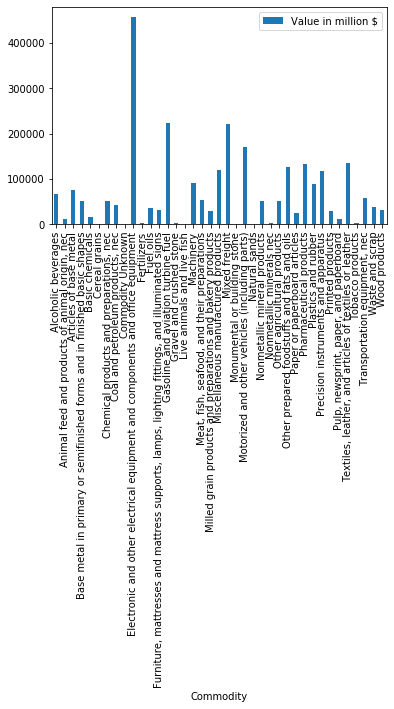

In [135]:
frame2.groupby(['Commodity']).sum().plot(kind='bar')

As can be seen from the above the most shipped commodity type from CA is "electronic and other electrical equipments and components and office equipment".

In [108]:
indexes=df3.index.tolist()
indexes

[27720,
 422099,
 112668,
 324699,
 283794,
 369364,
 406732,
 267996,
 207066,
 73577,
 93082,
 304515,
 128871,
 169795,
 489505,
 158174,
 221618,
 236630,
 475942,
 196583,
 460257,
 0,
 13260,
 143372,
 391191,
 147227,
 359671,
 58485,
 184524,
 48660,
 347419,
 447754,
 23800,
 233231,
 253494,
 256940,
 486404,
 264790,
 109757,
 69760,
 281462,
 181578,
 388468,
 322406,
 403884,
 501623,
 106774,
 251087,
 12753,
 457208,
 72257]

In [112]:
df5=df.drop(indexes, inplace=False)
df5

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
1,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
2,AL,Alabama,-,All U.S. Destinations,03,Other agricultural products,1392,3652,629,20.9,23.5,33.3
3,AL,Alabama,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",1349,4151,419,30.3,33,29.8
4,AL,Alabama,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",4517,2093,877,22.6,21,24.3
5,AL,Alabama,-,All U.S. Destinations,06,Milled grain products and preparations and bak...,1751,2262,679,33.8,43.3,48.2
...,...,...,...,...,...,...,...,...,...,...,...,...
503490,WY,Wyoming,WY,Wyoming,39,"Furniture, mattresses and mattress supports, l...",12,1,Z,45.4,43.9,39.5
503491,WY,Wyoming,WY,Wyoming,40,Miscellaneous manufactured products,200,S,S,33.9,S,S
503492,WY,Wyoming,WY,Wyoming,41,Waste and scrap,S,S,S,S,S,S
503493,WY,Wyoming,WY,Wyoming,43,Mixed freight,121,14,1,31.7,29.4,26.7


In [121]:
# df=df.drop(indexes, inplace=True)
df6=df5[df5["Commodity"]!="All Commodities"]
df6


,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
1,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
2,AL,Alabama,-,All U.S. Destinations,03,Other agricultural products,1392,3652,629,20.9,23.5,33.3
3,AL,Alabama,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",1349,4151,419,30.3,33,29.8
4,AL,Alabama,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",4517,2093,877,22.6,21,24.3
5,AL,Alabama,-,All U.S. Destinations,06,Milled grain products and preparations and bak...,1751,2262,679,33.8,43.3,48.2
...,...,...,...,...,...,...,...,...,...,...,...,...
503490,WY,Wyoming,WY,Wyoming,39,"Furniture, mattresses and mattress supports, l...",12,1,Z,45.4,43.9,39.5
503491,WY,Wyoming,WY,Wyoming,40,Miscellaneous manufactured products,200,S,S,33.9,S,S
503492,WY,Wyoming,WY,Wyoming,41,Waste and scrap,S,S,S,S,S,S
503493,WY,Wyoming,WY,Wyoming,43,Mixed freight,121,14,1,31.7,29.4,26.7


In [122]:
df6=df6[pd.to_numeric(df6['Value'], errors='coerce').notnull()]
df6


,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
1,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
2,AL,Alabama,-,All U.S. Destinations,03,Other agricultural products,1392,3652,629,20.9,23.5,33.3
3,AL,Alabama,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",1349,4151,419,30.3,33,29.8
4,AL,Alabama,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",4517,2093,877,22.6,21,24.3
5,AL,Alabama,-,All U.S. Destinations,06,Milled grain products and preparations and bak...,1751,2262,679,33.8,43.3,48.2
...,...,...,...,...,...,...,...,...,...,...,...,...
503487,WY,Wyoming,WY,Wyoming,35,Electronic and other electrical equipment and ...,119,10,1,14.7,28.7,40.2
503489,WY,Wyoming,WY,Wyoming,38,Precision instruments and apparatus,17,S,S,48.2,S,S
503490,WY,Wyoming,WY,Wyoming,39,"Furniture, mattresses and mattress supports, l...",12,1,Z,45.4,43.9,39.5
503491,WY,Wyoming,WY,Wyoming,40,Miscellaneous manufactured products,200,S,S,33.9,S,S


In [123]:
# df["Value"] = pd.to_numeric(df["Value"])
df7=df6.sort_values('Value', ascending=False).drop_duplicates(['Origin State'])
df7
# df.Value.apply(lambda x: x.str.isnumeric())

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
27754,CA,California,-,All U.S. Destinations,35,Electronic and other electrical equipment and ...,228412,7282,7887,8.4,11.2,11.7
406752,TN,Tennessee,-,All U.S. Destinations,21,Pharmaceutical products,154299,567,334,28.7,23.4,21.1
207101,MI,Michigan,-,All U.S. Destinations,36,Motorized and other vehicles (including parts),135885,22015,11876,12.8,15.1,21.6
422115,TX,Texas,-,All U.S. Destinations,17,Gasoline and aviation turbine fuel,133686,193568,20126,6.2,6.3,13.4
324734,OH,Ohio,-,All U.S. Destinations,36,Motorized and other vehicles (including parts),68660,12149,5022,10.7,10,13.2
158209,KY,Kentucky,-,All U.S. Destinations,36,Motorized and other vehicles (including parts),65830,9346,4712,48,28.6,38.9
112709,IL,Illinois,-,All U.S. Destinations,43,Mixed freight,62569,17321,4705,7.6,5.9,13.7
169810,LA,Louisiana,-,All U.S. Destinations,17,Gasoline and aviation turbine fuel,60101,91077,8424,11.7,11.4,33.8
268037,NJ,New Jersey,-,All U.S. Destinations,43,Mixed freight,52734,20357,2242,13.8,18.5,18.7
128906,IN,Indiana,-,All U.S. Destinations,36,Motorized and other vehicles (including parts),51919,8868,4819,16.5,12.6,23.8


### Which location ships the most amount of pharmaceutical products?

In [144]:
df10=df7[df7["Commodity"]=="Pharmaceutical products"]
df10

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
406752,TN,Tennessee,-,All U.S. Destinations,21,Pharmaceutical products,154299,567,334,28.7,23.4,21.1
304534,NC,North Carolina,-,All U.S. Destinations,21,Pharmaceutical products,37150,2037,1032,17.7,18.9,29.9
69776,DE,Delaware,-,All U.S. Destinations,21,Pharmaceutical products,10088,74,42,47,29.7,42.2


In [145]:
df12=df[df['Destination']=="All U.S. Destinations"]
df12=df12[df12["Commodity"]=="Pharmaceutical products"]
df12

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
19,AL,Alabama,-,All U.S. Destinations,21,Pharmaceutical products,S,599,146,S,43.2,48.6
4147,AL,"Birmingham-Hoover-Cullman, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,S,527,71,S,44.2,42.7
6999,AL,"Mobile-Daphne-Fairhope, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,S,Z,Z,S,41.2,38.8
9240,AL,Remainder of Alabama,-,All U.S. Destinations,21,Pharmaceutical products,2288,72,76,24.5,27,49.1
12772,AK,Alaska,-,All U.S. Destinations,21,Pharmaceutical products,S,S,S,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
486421,WV,West Virginia,-,All U.S. Destinations,21,Pharmaceutical products,1174,27,S,40.3,25.5,S
489525,WI,Wisconsin,-,All U.S. Destinations,21,Pharmaceutical products,7476,118,S,22.8,22.4,S
493990,WI,"Milwaukee-Racine-Waukesha, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,988,42,S,39.2,47.6,S
497474,WI,Remainder of Wisconsin,-,All U.S. Destinations,21,Pharmaceutical products,6489,77,26,27.5,22.4,36.5


In [143]:
df13=df12[pd.to_numeric(df12['Tons(thousands)'], errors='coerce').notnull()]

In [146]:
df13=df13.sort_values('Tons(thousands)', ascending=False)

In [147]:
df13

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
27740,CA,California,-,All U.S. Destinations,21,Pharmaceutical products,66546,2527,876,15.9,32.9,26.1
32534,CA,"Los Angeles-Long Beach-Riverside, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,36561,2252,669,24.8,36.9,33.3
304534,NC,North Carolina,-,All U.S. Destinations,21,Pharmaceutical products,37150,2037,1032,17.7,18.9,29.9
422119,TX,Texas,-,All U.S. Destinations,21,Pharmaceutical products,34580,1618,721,31,28.3,26.4
318642,NC,Remainder of North Carolina,-,All U.S. Destinations,21,Pharmaceutical products,12054,984,834,41.1,37.9,40
...,...,...,...,...,...,...,...,...,...,...,...,...
108072,HI,"Honolulu, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,1246,6,S,40,35.1,S
65029,CT,"New York-Newark-Bridgeport, NY-NJ-CT-PA, CFS A...",-,All U.S. Destinations,21,Pharmaceutical products,S,4,S,S,36.4,S
181597,ME,Maine,-,All U.S. Destinations,21,Pharmaceutical products,226,3,2,22.5,20.6,30.2
260054,NV,"Las Vegas-Paradise-Pahrump, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,173,3,S,44.5,42.4,S


In [151]:
df14=df12[pd.to_numeric(df12['Value'], errors='coerce').notnull()]
df14=df14.sort_values('Value', ascending=False)

In [152]:
df14

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
406752,TN,Tennessee,-,All U.S. Destinations,21,Pharmaceutical products,154299,567,334,28.7,23.4,21.1
411448,TN,"Memphis, TN-MS-AR, CFS Area (TN part)",-,All U.S. Destinations,21,Pharmaceutical products,135779,345,229,36.3,27.7,30.9
27740,CA,California,-,All U.S. Destinations,21,Pharmaceutical products,66546,2527,876,15.9,32.9,26.1
112688,IL,Illinois,-,All U.S. Destinations,21,Pharmaceutical products,51128,339,167,16.2,11.5,21.1
283814,NY,New York,-,All U.S. Destinations,21,Pharmaceutical products,49440,705,449,31.3,15.8,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...
67985,CT,Remainder of Connecticut,-,All U.S. Destinations,21,Pharmaceutical products,22,Z,Z,28.1,33.4,44.8
340631,OH,"Dayton-Springfield-Greenville, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,22,1,Z,9,38,40.5
175434,LA,"Lake Charles-Jennings, CFS Area",-,All U.S. Destinations,21,Pharmaceutical products,13,S,Z,42.2,S,46.2
279592,NJ,Remainder of New Jersey,-,All U.S. Destinations,21,Pharmaceutical products,12,Z,Z,31.6,41.3,40.6


#### California ships the highest number of pharmaceutical products in both Value and Tons.

## Shipments to the Destination For the Analysis of Demand

In [153]:
df20 = df[df["Destination"]!='All U.S. Destinations']
df20

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
42,AL,Alabama,AL,Alabama,00,All Commodities,72342,185312,10797,13.5,13.3,17.9
43,AL,Alabama,AL,Alabama,02,Cereal grains,4,22,2,24.9,23.7,40.3
44,AL,Alabama,AL,Alabama,03,Other agricultural products,806,2452,193,20.3,22.9,36
45,AL,Alabama,AL,Alabama,04,"Animal feed and products of animal origin, nec",733,3287,162,39.5,38.7,31.3
46,AL,Alabama,AL,Alabama,05,"Meat, fish, seafood, and their preparations",1813,848,51,24.2,21.3,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...
503490,WY,Wyoming,WY,Wyoming,39,"Furniture, mattresses and mattress supports, l...",12,1,Z,45.4,43.9,39.5
503491,WY,Wyoming,WY,Wyoming,40,Miscellaneous manufactured products,200,S,S,33.9,S,S
503492,WY,Wyoming,WY,Wyoming,41,Waste and scrap,S,S,S,S,S,S
503493,WY,Wyoming,WY,Wyoming,43,Mixed freight,121,14,1,31.7,29.4,26.7


In [154]:
df21 = df20[df20["Commodity"]!='All Commodities']
df21

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
43,AL,Alabama,AL,Alabama,02,Cereal grains,4,22,2,24.9,23.7,40.3
44,AL,Alabama,AL,Alabama,03,Other agricultural products,806,2452,193,20.3,22.9,36
45,AL,Alabama,AL,Alabama,04,"Animal feed and products of animal origin, nec",733,3287,162,39.5,38.7,31.3
46,AL,Alabama,AL,Alabama,05,"Meat, fish, seafood, and their preparations",1813,848,51,24.2,21.3,23.8
47,AL,Alabama,AL,Alabama,06,Milled grain products and preparations and bak...,481,364,40,40.5,35.6,39.6
...,...,...,...,...,...,...,...,...,...,...,...,...
503490,WY,Wyoming,WY,Wyoming,39,"Furniture, mattresses and mattress supports, l...",12,1,Z,45.4,43.9,39.5
503491,WY,Wyoming,WY,Wyoming,40,Miscellaneous manufactured products,200,S,S,33.9,S,S
503492,WY,Wyoming,WY,Wyoming,41,Waste and scrap,S,S,S,S,S,S
503493,WY,Wyoming,WY,Wyoming,43,Mixed freight,121,14,1,31.7,29.4,26.7


In [14]:
data_food=df[(df['SCTG']== "01")|(df['SCTG']== "02") | (df['SCTG']== "04") | (df['SCTG']== "05") | (df['SCTG']== "06")]
data_food

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
1,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
3,AL,Alabama,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",1349,4151,419,30.3,33,29.8
4,AL,Alabama,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",4517,2093,877,22.6,21,24.3
5,AL,Alabama,-,All U.S. Destinations,06,Milled grain products and preparations and bak...,1751,2262,679,33.8,43.3,48.2
43,AL,Alabama,AL,Alabama,02,Cereal grains,4,22,2,24.9,23.7,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...
503268,WY,Wyoming,UT,"Salt Lake City-Ogden-Clearfield, CFS Area",06,Milled grain products and preparations and bak...,S,S,S,S,S,S
503457,WY,Wyoming,WY,Wyoming,02,Cereal grains,S,S,S,S,S,S
503459,WY,Wyoming,WY,Wyoming,04,"Animal feed and products of animal origin, nec",S,S,S,S,S,S
503460,WY,Wyoming,WY,Wyoming,05,"Meat, fish, seafood, and their preparations",S,S,S,S,S,S


In [15]:
data_food=data_food[pd.to_numeric(data_food['Value'], errors='coerce').notnull()]
data_food=data_food[pd.to_numeric(data_food['Tons(thousands)'], errors='coerce').notnull()]
data_food

,Origin State,Origin State/CFS Area,Destination State,Destination,SCTG,Commodity,Value,Tons(thousands),Ton-miles(millions),Value CV,Tons CV,Ton-miles CV
1,AL,Alabama,-,All U.S. Destinations,02,Cereal grains,7,43,7,35.2,31.5,47.7
3,AL,Alabama,-,All U.S. Destinations,04,"Animal feed and products of animal origin, nec",1349,4151,419,30.3,33,29.8
4,AL,Alabama,-,All U.S. Destinations,05,"Meat, fish, seafood, and their preparations",4517,2093,877,22.6,21,24.3
5,AL,Alabama,-,All U.S. Destinations,06,Milled grain products and preparations and bak...,1751,2262,679,33.8,43.3,48.2
43,AL,Alabama,AL,Alabama,02,Cereal grains,4,22,2,24.9,23.7,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...
501527,WI,Remainder of Wisconsin,WI,"Milwaukee-Racine-Waukesha, CFS Area",06,Milled grain products and preparations and bak...,48,56,6,27.3,49.8,48.5
501561,WI,Remainder of Wisconsin,WI,Remainder of Wisconsin,01,Live animals and live fish,54,27,1,27.2,25.6,24.3
501564,WI,Remainder of Wisconsin,WI,Remainder of Wisconsin,04,"Animal feed and products of animal origin, nec",1285,2590,155,22.8,26.9,29.3
501565,WI,Remainder of Wisconsin,WI,Remainder of Wisconsin,05,"Meat, fish, seafood, and their preparations",926,334,32,23.2,19.3,20.6


## Food Product Demands(in dollars) in 2007 for all US destinations

Products

0 - Animals and Fish (live)

1 - Cereal Grains (includes seed)

2 - Animal Feed, Eggs, Honey, and Other Products of Animal Origin

3 - Meat, Poultry, Fish, Seafood, and Their Preparations

4 - Milled Grain Products and Preparations, and Bakery Products


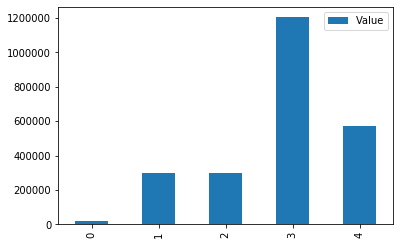

In [16]:
data_food.groupby(['SCTG'], as_index=False)['Value'].sum().plot(kind='bar')


# data_food = data_food.groupby(['SCTG'], as_index=False)['SHIPMT_VALUE'].sum()
# data_food

As can be seen from the above plot the most demanded (in dollars) food product in 2007 for all of the US destinations is the category of meat, poultry, fish, seafood and their preperations.

## Food Product Demands(in tons) in 2007 for all US destinations

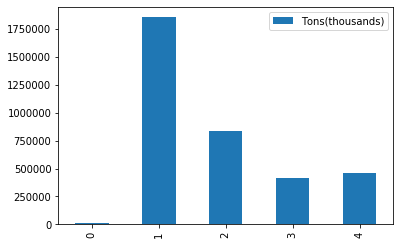

In [17]:
data_food.groupby(['SCTG'], as_index=False)['Tons(thousands)'].sum().plot(kind='bar')

As can be seen from the above plot the most demanded (in tons) food product in 2007 for all of the US destinations is cereal grains.

In [12]:
data_food2 = data_food.groupby(['Destination State', 'SCTG', 'Commodity'], as_index=False)['Value','Tons(thousands)'].sum()
print (data_food2)


    Destination State SCTG                                          Commodity  \
0                   -   01                         Live animals and live fish   
1                   -   02                                      Cereal grains   
2                   -   04     Animal feed and products of animal origin, nec   
3                   -   05        Meat, fish, seafood, and their preparations   
4                   -   06  Milled grain products and preparations and bak...   
..                ...  ...                                                ...   
207                WV   05        Meat, fish, seafood, and their preparations   
208                WV   06  Milled grain products and preparations and bak...   
209                WY   04     Animal feed and products of animal origin, nec   
210                WY   05        Meat, fish, seafood, and their preparations   
211                WY   06  Milled grain products and preparations and bak...   

      Value  Tons(thousands

In [13]:
data_food2

,Destination State,SCTG,Commodity,Value,Tons(thousands)
0,-,01,Live animals and live fish,9899,5749
1,-,02,Cereal grains,132564,811192
2,-,04,"Animal feed and products of animal origin, nec",130402,356954
3,-,05,"Meat, fish, seafood, and their preparations",486164,169284
4,-,06,Milled grain products and preparations and bak...,244042,195183
...,...,...,...,...,...
207,WV,05,"Meat, fish, seafood, and their preparations",244,108
208,WV,06,Milled grain products and preparations and bak...,155,164
209,WY,04,"Animal feed and products of animal origin, nec",18,46
210,WY,05,"Meat, fish, seafood, and their preparations",206,22


In [14]:
data_food2=data_food2[data_food2["Destination State"]!= "-"]
data_food2

,Destination State,SCTG,Commodity,Value,Tons(thousands)
5,AK,05,"Meat, fish, seafood, and their preparations",1802,625
6,AK,06,Milled grain products and preparations and bak...,112,41
7,AL,02,Cereal grains,1107,8138
8,AL,04,"Animal feed and products of animal origin, nec",3658,14663
9,AL,05,"Meat, fish, seafood, and their preparations",12344,5513
...,...,...,...,...,...
207,WV,05,"Meat, fish, seafood, and their preparations",244,108
208,WV,06,Milled grain products and preparations and bak...,155,164
209,WY,04,"Animal feed and products of animal origin, nec",18,46
210,WY,05,"Meat, fish, seafood, and their preparations",206,22


## Plotting the Demand for Meat Products (in dollars) for each state

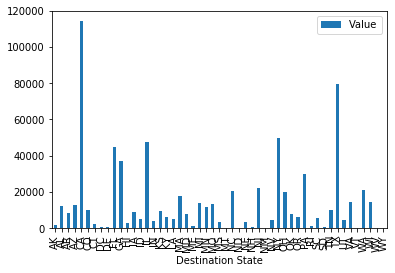

In [20]:
data_food=data_food[data_food["Destination State"]!= "-"]
data_food=data_food.groupby(['Destination State', 'SCTG'], as_index=False)['Value', 'Tons(thousands)'].sum()
meat=data_food[data_food["SCTG"]=="05"]
meat.plot(x='Destination State', y='Value', kind='bar')

Meat, fish, seafood and their preperations are demanded the most(in dollars) in CA in 2007. The second highest demand is in TX.

## Plotting the Demand for Meat Products (in tons) for each state

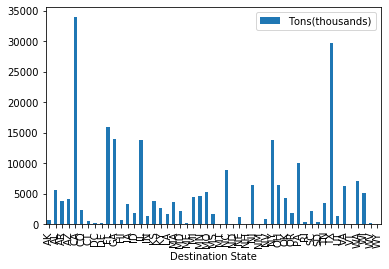

In [21]:
data_food=data_food[data_food["Destination State"]!= "-"]
data_food=data_food.groupby(['Destination State', 'SCTG'], as_index=False)['Value', 'Tons(thousands)'].sum()
meat=data_food[data_food["SCTG"]=="05"]
meat.plot(x='Destination State', y='Tons(thousands)', kind='bar')

Meat, fish, seafood and their preperations are demanded the most(in tons) in CA in 2007. The second highest demand is in TX.

In [16]:
maxval_05 = data_food2[data_food2["SCTG"]=="05"]
maxrow_05 = maxval_05.Value.max()

In [18]:
maxval_05.iloc[maxval_05['Value'].idxmax()] 

Destination State                                             MI
SCTG                                                          05
Commodity            Meat, fish, seafood, and their preparations
Value                                                      13887
Tons(thousands)                                             4369
Name: 96, dtype: object

In [19]:
maxval_05.iloc[maxval_05['Tons(thousands)'].idxmax()] 

Destination State                                             MI
SCTG                                                          05
Commodity            Meat, fish, seafood, and their preparations
Value                                                      13887
Tons(thousands)                                             4369
Name: 96, dtype: object

Meat, fish, seafood, and their preperations are demanded the most by the state MI both in value and tons.

In [20]:
maxval_06 = data_food2[data_food2["SCTG"]=="06"]
maxval_06

,Destination State,SCTG,Commodity,Value,Tons(thousands)
6,AK,06,Milled grain products and preparations and bak...,112,41
10,AL,06,Milled grain products and preparations and bak...,4182,3357
14,AR,06,Milled grain products and preparations and bak...,723,920
18,AZ,06,Milled grain products and preparations and bak...,1960,1539
23,CA,06,Milled grain products and preparations and bak...,57972,49279
27,CO,06,Milled grain products and preparations and bak...,1920,1523
30,CT,06,Milled grain products and preparations and bak...,3271,1998
36,DE,06,Milled grain products and preparations and bak...,481,1002
40,FL,06,Milled grain products and preparations and bak...,10009,6586
45,GA,06,Milled grain products and preparations and bak...,20129,14819


In [21]:
maxval_06.iloc[maxval_06['Value'].idxmax()] 

Destination State                                                   MO
SCTG                                                                06
Commodity            Milled grain products and preparations and bak...
Value                                                             4543
Tons(thousands)                                                   5269
Name: 107, dtype: object

In [22]:
maxval_06.iloc[maxval_06['Tons(thousands)'].idxmax()] 

Destination State                                                   MO
SCTG                                                                06
Commodity            Milled grain products and preparations and bak...
Value                                                             4543
Tons(thousands)                                                   5269
Name: 107, dtype: object

Milled grain products and their preperations are demanded the most by the state MO both in value and tons.

In [25]:
maxval_02 = data_food2[data_food2["SCTG"]=="02"]
maxval_02

,Destination State,SCTG,Commodity,Value,Tons(thousands)
7,AL,02,Cereal grains,1107,8138
11,AR,02,Cereal grains,667,3384
15,AZ,02,Cereal grains,164,1003
20,CA,02,Cereal grains,2127,10897
24,CO,02,Cereal grains,1678,11482
33,DE,02,Cereal grains,79,615
37,FL,02,Cereal grains,43,329
42,GA,02,Cereal grains,1885,12832
50,IA,02,Cereal grains,4243,30528
55,ID,02,Cereal grains,2723,18150


In [31]:
maxval_02.sort_values('Value', ascending=False).head(3)

,Destination State,SCTG,Commodity,Value,Tons(thousands)
79,LA,02,Cereal grains,54610,351583
70,KS,02,Cereal grains,17550,118022
180,TX,02,Cereal grains,17334,102192


In [32]:
maxval_02.sort_values('Tons(thousands)', ascending=False).head(3)

,Destination State,SCTG,Commodity,Value,Tons(thousands)
79,LA,02,Cereal grains,54610,351583
70,KS,02,Cereal grains,17550,118022
180,TX,02,Cereal grains,17334,102192


In [33]:
maxval_01 = data_food2[data_food2["SCTG"]=="01"]
maxval_01.sort_values('Value', ascending=False).head(3)

,Destination State,SCTG,Commodity,Value,Tons(thousands)
69,KS,01,Live animals and live fish,4232,2324
74,KY,01,Live animals and live fish,1530,434
179,TX,01,Live animals and live fish,996,485


In [34]:
maxval_01.sort_values('Tons(thousands)', ascending=False).head(3)

,Destination State,SCTG,Commodity,Value,Tons(thousands)
69,KS,01,Live animals and live fish,4232,2324
59,IL,01,Live animals and live fish,449,669
195,WA,01,Live animals and live fish,752,548


Live animals and live fish demanded the most in the state KS.

Cereal grains have the biggest demand among these food SCTG's in Louisiana.